# Predict the Business License Status Dataset

## The Aim is to perform a multi-class classification of the business license status of various users, from the given dataset.


### Problem Statement
Many of us have dreams what if I become the founder of a start-up and can lead it to become a big business like Microsoft, or Facebook/Amazon. But again there are many people who cheat people to run their business, probably everyone has heard about cheat-funds. This dataset contains a lot of data and the ‘LICENSE STATUS’ column which depicts whether the person has been able to get a business license or not. Based on the given features you have to predict whether a person will be given a license or not to run his business. The ‘LICENSE STATUS’ contains the following categories:

AAC (license was cancelled during term)

AAI (license was issued)

INQ (license requires inquiry)

REA (license revocation has been appealed)

REV (license was revoked)

You have to predict the column “LICENSE STATUS” and please submit in the format given in the “sample_submissions.csv” file.


## Evaluation Criterion
## The evaluation criteria is the f1- score with ‘weighted ’ average.

### Loading required libraries

In [1]:
import pandas as pd
import numpy as np


### Loading the data

In [2]:
train_data = pd.read_csv("train_file.csv")
train_data.head()

C:\Users\mypc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
train_data.shape

(85895, 32)

In [4]:
test_data = pd.read_csv("test_file.csv")
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [5]:
test_data.shape

(57239, 31)

### Creating data frame for submission file

In [6]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [7]:
my_submission.shape

(57239, 1)

### Checking the data

#### Checking the type of columns present in the given data

In [8]:
train_data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

#### Checking the null values present in the given data to know the feature importance

In [9]:
train_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [10]:
test_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

#### Checking the unique values for each colummn in the given data  

In [11]:
train_data.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [12]:
test_data.nunique()

ID                                   57239
LICENSE ID                           57239
ACCOUNT NUMBER                       36724
SITE NUMBER                            297
LEGAL NAME                           36523
DOING BUSINESS AS NAME               39364
ADDRESS                              39637
CITY                                   331
STATE                                   43
ZIP CODE                               420
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2461
POLICE DISTRICT                         25
LICENSE CODE                           124
LICENSE DESCRIPTION                    124
LICENSE NUMBER                       49383
APPLICATION TYPE                         6
APPLICATION CREATED DATE              3684
APPLICATION REQUIREMENTS COMPLETE     3884
PAYMENT DATE                          4930
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               3737
LICENSE TER

### Studying the Distribution of target variable on the given data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

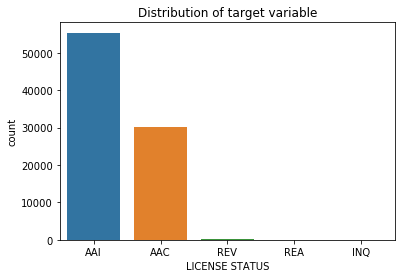

In [14]:
plt.title('Distribution of target variable')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()

In [15]:
# The count of each target variable
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

### Data preprocessing

#### Dropping the unnecessary columns in both datasets which does not useful for model building.

In [16]:
Drop_list = ['APPLICATION CREATED DATE', 'SSA', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION', 'LONGITUDE', 'LATITUDE','ZIP CODE']

In [17]:
train_data = train_data.drop(Drop_list, axis=1)
test_data = test_data.drop(Drop_list, axis=1)

In [18]:
train_data.shape


(85895, 23)

In [19]:
test_data.shape

(57239, 22)

#### Writing functions to extraxt year and month from datetime data, impute missing values by mean

In [20]:
from datetime import datetime

In [21]:
def conv_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [22]:
date_list = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE',
             'DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
conv_date(date_list)

In [23]:
def get_year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def get_month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)

In [24]:
get_year('PAYMENT YEAR', 'PAYMENT DATE')
get_month('PAYMENT MONTH', 'PAYMENT DATE')
get_year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
get_year('DATE ISSUED YEAR', 'DATE ISSUED')
get_year('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
get_year('LICENSE APPROVED YEAR', 'LICENSE APPROVED FOR ISSUANCE')
get_year('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

In [25]:
# Function to impute missing values by rounded value of mean
def round_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [26]:
imp_mean_list = ['LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'PAYMENT YEAR', 'LICENSE APPROVED YEAR',
                 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE STATUS CHANGE YEAR']
round_mean(imp_mean_list)

In [27]:
train_data['LICENSE VALIDITY'] = abs(train_data['LICENSE TERM EXPIRATION YEAR'] - train_data['LICENSE TERM START YEAR'])
test_data['LICENSE VALIDITY'] = abs(test_data['LICENSE TERM EXPIRATION YEAR'] - test_data['LICENSE TERM START YEAR'])

In [28]:
col_list = ['PAYMENT DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'LICENSE TERM EXPIRATION DATE', 'DATE ISSUED', 
            'LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START DATE', 'LICENSE TERM START YEAR', 
            'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']

In [29]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [30]:
# Function to impute with None
def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')

In [31]:
imp_none_list = ['LEGAL NAME', 'DOING BUSINESS AS NAME']
impute_none(imp_none_list)

In [32]:

train_data['LEGAL NAME'].apply(lambda x: x.upper())
train_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,...,APPLICATION TYPE,CONDITIONAL APPROVAL,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,22.0,28.0,22-28,10.0,...,RENEW,N,AAI,2002.0,8.0,2002.0,2006,2002.0,2009.0,1.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,33.0,23.0,33-23,17.0,...,RENEW,N,AAC,2005.0,11.0,2005.0,2006,2006.0,2006.0,1.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,NaN,NaN,NaN,NaN,...,ISSUE,N,AAI,2009.0,7.0,2009.0,2009,2009.0,2009.0,2.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,NaN,NaN,NaN,NaN,...,ISSUE,N,AAI,2004.0,2.0,2004.0,2004,2004.0,2009.0,1.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,NaN,NaN,NaN,NaN,...,RENEW,N,AAI,2008.0,6.0,2008.0,2008,2008.0,2009.0,2.0


In [33]:
test_data['LEGAL NAME'].apply(lambda x: x.upper())
test_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,...,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,IL,42.0,67.0,42-67,18.0,...,1516615.0,RENEW,N,2012.0,1.0,2011.0,2012,2012.0,2012.0,2.0
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,IL,16.0,5.0,16-5,7.0,...,69813.0,RENEW,N,2012.0,11.0,2011.0,2012,2012.0,2012.0,2.0
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,IL,4.0,8.0,4-8,1.0,...,1519227.0,RENEW,N,2004.0,12.0,2004.0,2004,2004.0,2009.0,1.0
3,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,CHICAGO,IL,9.0,33.0,9-33,5.0,...,1922025.0,RENEW,N,2010.0,11.0,2010.0,2010,2007.0,2012.0,2.0
4,283018,3,MARINCA A. COVARRUBIAS,DETAILS,CHICAGO,IL,15.0,26.0,15-26,9.0,...,1675683.0,RENEW,N,2007.0,8.0,2007.0,2007,2007.0,2008.0,2.0


#### Converting the columns 'LEGAL NAME', 'DOING BUSINESS AS NAME' to extract useful information

In [34]:
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace('.', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [35]:
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace('.', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [36]:
train_data['LEGAL TYPE'] = 'PVT'
test_data['LEGAL TYPE'] = 'PVT'

#### Checking the type of business from the 'LEGAL NAME' and 'DOING BUSINESS AS NAME' columns i.e. Incorporated, LLC, Corporation or Ltd etc

In [37]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])

In [38]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])


In [39]:
train_data['LEGAL TYPE'].value_counts()

CORP    27765
PVT     27020
INC     24447
LLC      5048
LTD      1615
Name: LEGAL TYPE, dtype: int64

In [40]:
test_data['LEGAL TYPE'].value_counts()

INC     19603
PVT     17607
CORP    13496
LLC      5014
LTD      1519
Name: LEGAL TYPE, dtype: int64

In [41]:
drop_list = ['DOING BUSINESS AS NAME', 'LEGAL NAME']

In [42]:
train_data = train_data.drop(drop_list, axis=1)
test_data = test_data.drop(drop_list, axis=1)

####  Extracting useful information from the column 'LICENSE DESCRIPTION'

In [43]:
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [44]:
train_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                    50078
Home Repair                                 10633
Peddler                                      3782
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Guard Dog Service                               1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Airport Pushcart Liquor O'Hare - Class A        1
Airport Pushcart Liquor Midway - Class A        1
Name: LICENSE DESCRIPTION, Length: 92, dtype: int64

In [45]:
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [46]:
test_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                    28094
Retail Food Establishment                    4788
Home Occupation                              3021
Tobacco                                      2426
Home Repair                                  1860
                                            ...  
License Manager                                 1
Shared Housing Unit Operator                    1
Airport Pushcart Liquor O'Hare - Class A        1
Private Booting Operation                       1
Navy Pier Kiosk License                         1
Name: LICENSE DESCRIPTION, Length: 111, dtype: int64

In [47]:
def impute_nil(imp_nil_list):
    for i in imp_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)

imp_nil_list = ['WARD', 'PRECINCT', 'POLICE DISTRICT', 'PAYMENT MONTH', 'WARD PRECINCT', 'LICENSE NUMBER']
impute_nil(imp_nil_list)

#### Label encoding for target variable

In [48]:
from sklearn.preprocessing import LabelEncoder


In [49]:
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REV', 2)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REA', 3)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('INQ', 4)

In [50]:
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [51]:
train_data = create_dummies(train_data)

CITY encoded
STATE encoded
WARD PRECINCT encoded
argument must be a string or number
LICENSE DESCRIPTION encoded


C:\Users\mypc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
LEGAL TYPE encoded


In [52]:
test_data = create_dummies(test_data)

CITY encoded
STATE encoded
WARD PRECINCT encoded
argument must be a string or number
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded


C:\Users\mypc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


LEGAL TYPE encoded


In [53]:
encoder = LabelEncoder()
train_data["WARD PRECINCT"] = encoder.fit_transform(train_data["WARD PRECINCT"].astype(str))
test_data["WARD PRECINCT"] = encoder.fit_transform(test_data["WARD PRECINCT"].astype(str))

In [54]:
train_data["LICENSE STATUS"].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

#### Sampling the data
##### We will oversample the data of REA, REV since we have very few records of those in the training set. We will also undersample the data of AAC and AAI since we have abundance of their data which may add bias to our model. Hence we will train our model on a very balanced data

In [55]:
train_data = train_data.sample(frac=1)

# Amount of fraud classes in proportion.
fraud_df = train_data[train_data['LICENSE STATUS'] == 4]
pending_df = train_data[train_data['LICENSE STATUS'] == 3]
accepted_df = train_data[train_data['LICENSE STATUS'] == 2]

non_fraud_df = train_data[train_data['LICENSE STATUS'] == 1][:290]
non_accepted_df = train_data[train_data['LICENSE STATUS'] == 0][:300]

normal_distributed_df = pd.concat([fraud_df, pending_df, accepted_df, non_fraud_df, non_accepted_df, fraud_df,
                                  fraud_df, fraud_df, fraud_df, pending_df, pending_df, fraud_df, pending_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,...,CONDITIONAL APPROVAL,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
6087,372079,1,193,16,17.0,0.0,339,0.0,1006,72,...,0,2,2014.0,5.0,2014.0,2014,2014.0,2015.0,2.0,4
56448,308239,1,193,16,45.0,31.0,1851,16.0,1524,44,...,0,1,2006.0,8.0,2006.0,2006,2006.0,2007.0,1.0,1
18890,346762,1,193,16,35.0,60.0,1339,14.0,1524,44,...,0,2,2009.0,9.0,2009.0,2009,2009.0,2011.0,2.0,0
81466,9344,1,193,16,15.0,16.0,264,9.0,1010,41,...,0,2,2010.0,1.0,2009.0,2010,2010.0,2010.0,2.0,1
28426,270,1,193,16,6.0,50.0,2189,7.0,1006,72,...,0,2,2002.0,5.0,2002.0,2002,2002.0,2002.0,1.0,4


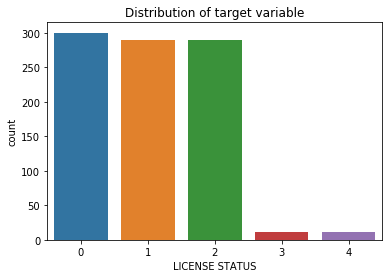

In [56]:
plt.title('Distribution of target variable')
sns.countplot(new_df['LICENSE STATUS'])
plt.show()

In [57]:
new_df['LICENSE STATUS'].value_counts()

0    300
2    290
1    290
4     12
3     12
Name: LICENSE STATUS, dtype: int64

In [58]:
col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED YEAR']
new_df = new_df.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

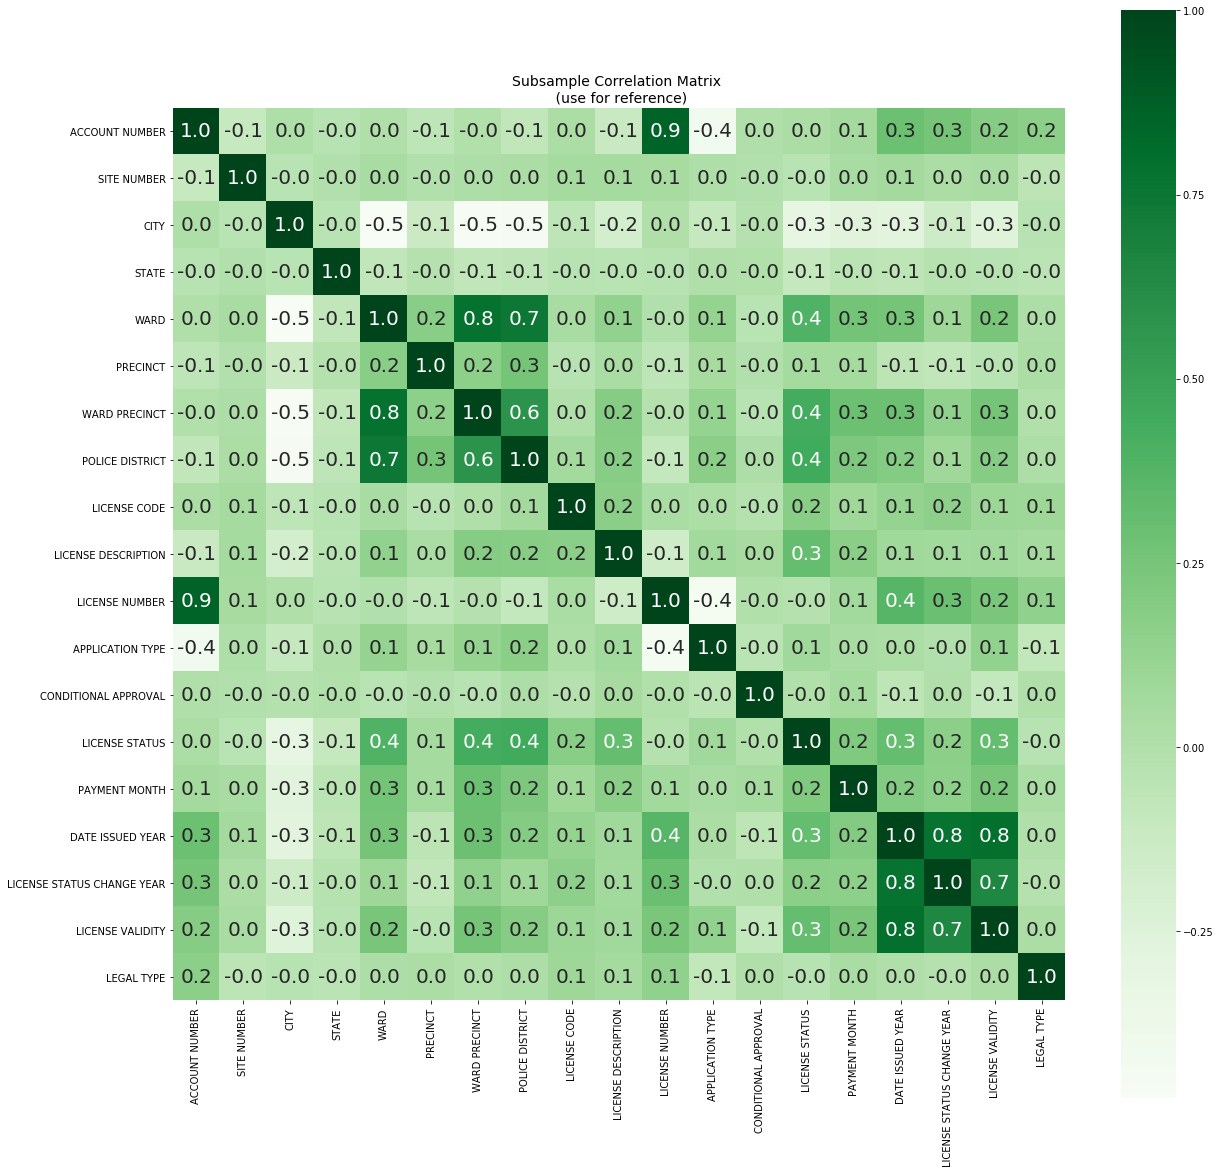

In [59]:
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

## Model Building 

In [60]:
X = new_df.drop('LICENSE STATUS', axis=1)
y = new_df['LICENSE STATUS']

In [61]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [62]:

# Splitting the data into training set and testset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)


## Xg boost 

In [63]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report
xb_cla = xgb.XGBClassifier()
xg_cla= xgb.XGBClassifier(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5,alpha = 10, n_estimators = 10)
xg_cla.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:

# predict the labels on train dataset
pred_train = xg_cla.predict(X_train)

# predict the labels on validation dataset
pred_val = xg_cla.predict(X_test)


### Here Target is multiclass F1 score won't work on multiclass but average='binary' will choose another average setting, one of [None, 'micro', 'macro', 'weighted']



In [65]:
print(classification_report(y_train, pred_train,target_names=['class 0','class 1','class 2','class 3','class4']))
print(classification_report(y_test, pred_val,target_names=['class 0','class 1','class 2','class 3','class4']))

              precision    recall  f1-score   support

     class 0       0.93      0.96      0.94       222
     class 1       0.93      0.84      0.88       223
     class 2       0.91      0.97      0.94       212
     class 3       1.00      0.70      0.82        10
      class4       1.00      1.00      1.00        11

    accuracy                           0.92       678
   macro avg       0.95      0.89      0.92       678
weighted avg       0.92      0.92      0.92       678

              precision    recall  f1-score   support

     class 0       0.93      0.88      0.91        78
     class 1       0.81      0.84      0.82        67
     class 2       0.91      0.95      0.93        78
     class 3       1.00      0.50      0.67         2
      class4       1.00      1.00      1.00         1

    accuracy                           0.89       226
   macro avg       0.93      0.83      0.87       226
weighted avg       0.89      0.89      0.89       226



In [66]:
y_pred = xg_cla.predict(X_test)

In [67]:
train_Xgbm_pred =xg_cla.predict(X_train)
test_Xgbm_pred = xg_cla.predict(X_test)

print(xg_cla.score(X_train, y_train))
print(xg_cla.score(X_test, y_test))

0.9218289085545722
0.8893805309734514


### Confusion matrix 

In [70]:
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

In [71]:
print(confusion_matrix(y_true=y_train, y_pred = train_Xgbm_pred))
confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_Xgbm_pred)
print(confusion_matrix_test)


[[214   8   0   0   0]
 [ 17 188  18   0   0]
 [  0   7 205   0   0]
 [  0   0   3   7   0]
 [  0   0   0   0  11]]
[[69  9  0  0  0]
 [ 5 56  6  0  0]
 [ 0  4 74  0  0]
 [ 0  0  1  1  0]
 [ 0  0  0  0  1]]


In [72]:
# Predicting on the test dataset
my_pred = xg_cla.predict(test_data)

In [73]:
my_submission['LICENSE STATUS'] = my_pred

In [74]:
my_submission.shape

(57239, 2)

In [75]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'INQ')

In [76]:
my_submission.to_csv('xgboost_submission.csv', index=False)

## Random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

classifiers = GridSearchCV(rf,param_grid=param_grid_rf,cv=5)

In [79]:
%%time
classifiers.fit(X_train,y_train)

Wall time: 3min 34s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [80]:
predictions = classifiers.predict(X_train)
predictions1 = classifiers.predict(X_test)

In [81]:
print(f'Train_Accuracy :',accuracy_score(y_train,predictions))
print(f'Test_Accuracy :',accuracy_score(y_test,predictions1))

Train_Accuracy : 0.9926253687315634
Test_Accuracy : 0.8805309734513275


In [82]:
print(classification_report(y_train, predictions,target_names=['class 0','class 1','class 2','class 3','class4']))
print(classification_report(y_test, predictions1,target_names=['class 0','class 1','class 2','class 3','class4']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       222
     class 1       0.99      0.99      0.99       223
     class 2       0.99      0.99      0.99       212
     class 3       1.00      1.00      1.00        10
      class4       1.00      1.00      1.00        11

    accuracy                           0.99       678
   macro avg       1.00      1.00      1.00       678
weighted avg       0.99      0.99      0.99       678

              precision    recall  f1-score   support

     class 0       0.97      0.92      0.95        78
     class 1       0.78      0.84      0.81        67
     class 2       0.88      0.87      0.88        78
     class 3       1.00      1.00      1.00         2
      class4       1.00      1.00      1.00         1

    accuracy                           0.88       226
   macro avg       0.93      0.93      0.93       226
weighted avg       0.88      0.88      0.88       226



In [83]:
y_pred = classifiers.predict(X_test)

In [84]:
train_rf_pred =classifiers.predict(X_train)
test_rf_pred = classifiers.predict(X_test)

print(classifiers.score(X_train, y_train))
print(classifiers.score(X_test, y_test))

0.9926253687315634
0.8805309734513275


### Confusion matrix 

In [85]:
print(confusion_matrix(y_true=y_train, y_pred = train_rf_pred))
confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_rf_pred)
print(confusion_matrix_test)


[[222   0   0   0   0]
 [  0 220   3   0   0]
 [  0   2 210   0   0]
 [  0   0   0  10   0]
 [  0   0   0   0  11]]
[[72  6  0  0  0]
 [ 2 56  9  0  0]
 [ 0 10 68  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  1]]


In [86]:
#Predicting on the test dataset
my_pred = classifiers.predict(test_data)

In [87]:
my_submission['LICENSE STATUS'] = my_pred

In [88]:
my_submission.shape

(57239, 2)

In [89]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'INQ')

In [90]:
my_submission.to_csv('Randomforest_submission.csv', index=False)

# Conclusion

### As per the dataset concluded that Xg boost and Random forest are the best for Model Building. From overall analysis, the macro avg and weighted average of F1 score for Random forest is around 0.93 & 0.89 which is highest in predicting the License Status.